In [2]:
# First import package I need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploratory

In [4]:
train_df= pd.read_csv("C:/Users/Yan3/Desktop/dataset/BI_attrition/input/train.csv")
test_df= pd.read_csv("C:/Users/Yan3/Desktop/dataset/BI_attrition/input/test.csv")

In [5]:
train_df.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


#### Data check(missing data, type...)

In [6]:
train_df.isnull().any()

user_id                     False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYe

#### OK,no missing data,cool

In [5]:
#### Since variable "ID" and "EmployeeNumber" are useless, I drop it.
train_df = train_df.drop(['user_id'], axis=1)
test = test_df.drop(["user_id"],axis=1)

In [6]:
train_df.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

#### Now,I need to seperate numerical and categorical variables

In [7]:
categorical = train_df.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [8]:
numerical = train_df.select_dtypes(include=['float64','int64'])

In [9]:
print((numerical.columns))

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Label'],
      dtype='object')


#### take a look at the distribution of data

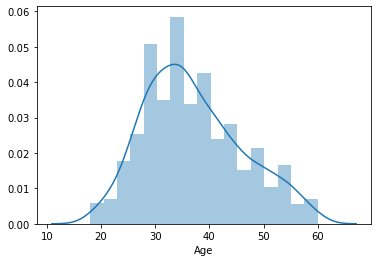

In [10]:
sns.distplot(train_df['Age'])

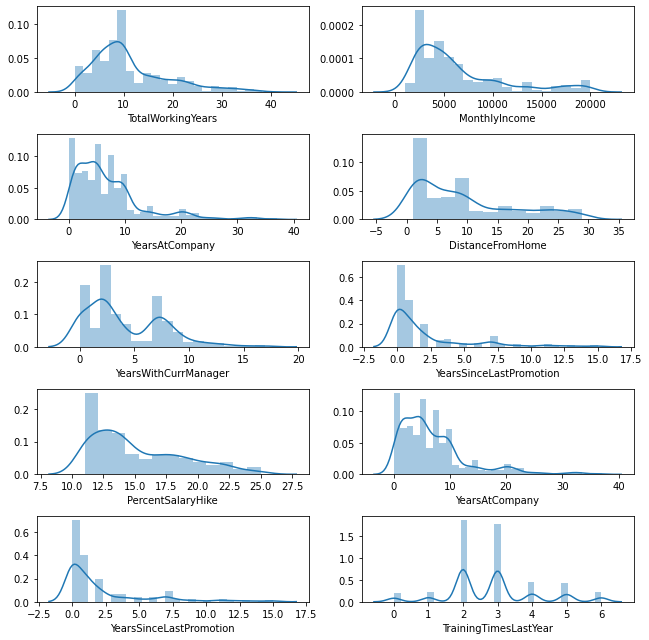

In [11]:
fig, ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(train_df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(train_df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(train_df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(train_df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(train_df['YearsWithCurrManager'], ax = ax[2,0])
sns.distplot(train_df['YearsSinceLastPromotion'], ax = ax[2,1])
sns.distplot(train_df['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(train_df['YearsAtCompany'], ax = ax[3,1])
sns.distplot(train_df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(train_df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

### Correlation of variables

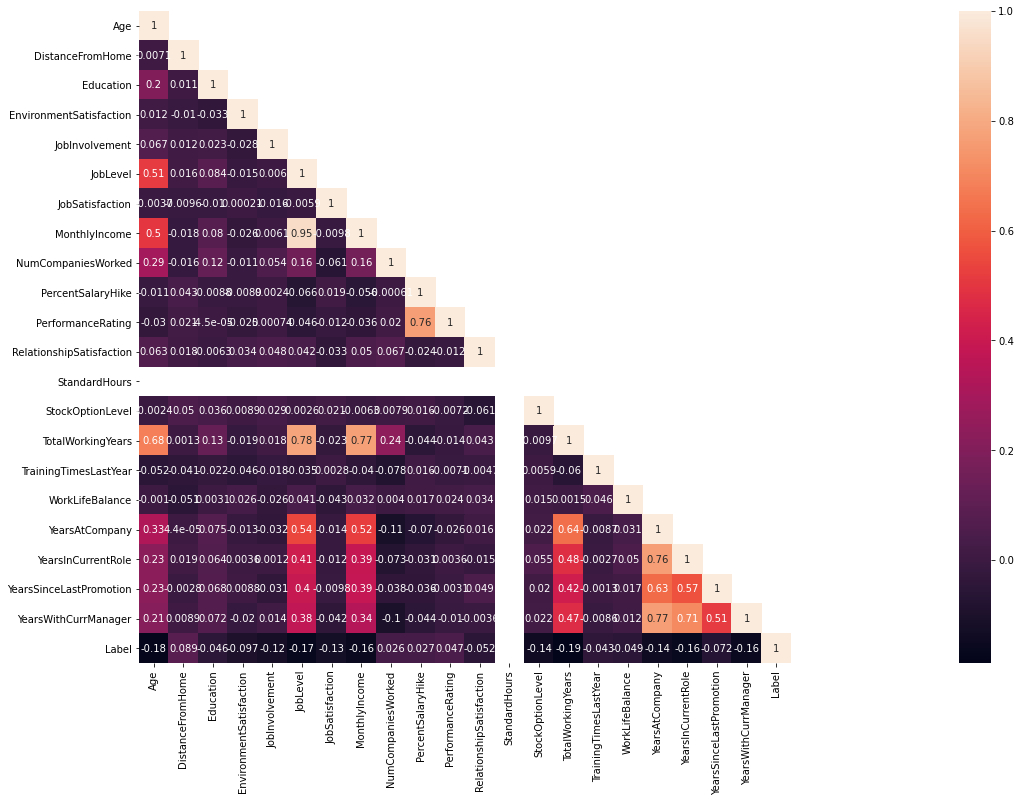

In [12]:
cor_mat = train_df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

In [13]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced,Y,No
1,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,Y,No
2,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Y,No
4,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y,No


In [14]:
train_df_cat = pd.get_dummies(categorical)

In [15]:
train_df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0


In [16]:
numerical.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
0,37,1,4,1,2,2,3,5993,1,18,...,80,1,7,2,4,7,5,0,7,0
1,54,1,4,4,3,3,3,10502,7,17,...,80,1,33,2,1,5,4,1,4,0
2,34,7,3,1,1,2,3,6074,1,24,...,80,0,9,3,3,9,7,0,6,1
3,39,1,1,4,2,4,4,12742,1,16,...,80,1,21,3,3,21,6,11,8,0
4,28,1,3,1,2,1,2,2596,1,15,...,80,2,1,2,3,1,0,0,0,1


In [17]:
train_df_final = pd.concat([numerical,train_df_cat], axis=1)

In [18]:
train_df_final = train_df_final.drop(["Label"],axis=1)
train_df_final.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,37,1,4,1,2,2,3,5993,1,18,...,0,0,0,0,1,0,0,1,1,0
1,54,1,4,4,3,3,3,10502,7,17,...,0,0,0,0,1,0,0,1,1,0
2,34,7,3,1,1,2,3,6074,1,24,...,0,0,0,0,0,0,1,1,0,1
3,39,1,1,4,2,4,4,12742,1,16,...,0,0,0,0,0,1,0,1,1,0
4,28,1,3,1,2,1,2,2596,1,15,...,0,0,0,0,1,0,0,1,1,0


### Build baseline model(logistic regression)

In [19]:
categorical_test = test.select_dtypes(include = 'object')
test_cat = pd.get_dummies(categorical_test)
numerical_test = test.select_dtypes(include=['float64','int64'])
test_final = pd.concat([numerical_test,test_cat], axis=1)
test_final.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,40,9,4,3,3,2,3,3975,3,11,...,0,0,0,0,1,0,0,1,1,0
1,53,7,2,4,3,5,3,18606,3,18,...,0,0,0,0,1,0,0,1,1,0
2,42,2,4,1,2,2,4,6781,3,23,...,0,0,0,0,0,0,1,1,1,0
3,34,11,3,3,2,2,2,4490,4,11,...,0,0,0,0,0,1,0,1,1,0
4,32,1,1,4,3,1,1,2956,1,13,...,0,1,0,0,0,0,1,1,1,0


In [20]:
Y_train= train_df["Label"]
X_train= train_df_final
X_test= test_final
X_train.shape, Y_train.shape, X_test.shape

((1100, 50), (1100,), (350, 50))

In [21]:
from sklearn import preprocessing 

In [22]:
# Normalization
normalizer=preprocessing.Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train) 
X_test_norm = normalizer.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_norm, Y_train)
Y_pred = logreg.predict(X_test_norm)
acc_log = round(logreg.score(X_train_norm, Y_train) * 100, 2)
acc_log

83.82

In [25]:
submission = pd.DataFrame({
        "Id": test_df["ID"],
        "Label": Y_pred
    })
submission.to_csv('C:/Users/Yan3/Desktop/dataset/IBM_attrition/Output/submission.csv', index=False)